## 2-1. 프로젝트: 고양이 수염 스티커 만들기

In [19]:
# 필요한 패키지 import 하기
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

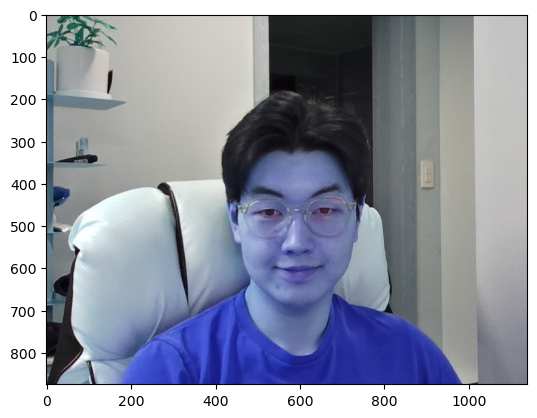

In [20]:
# BGR 이미지 출력해보기

my_image_path = './my_selfie.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

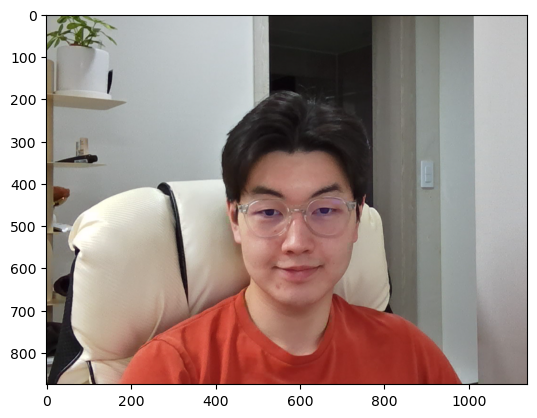

In [21]:
# RGB 이미지로 출력하기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [22]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
# detector로 디텍팅 사각형 정보들 불러오기기
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(419, 384) (740, 705)]]


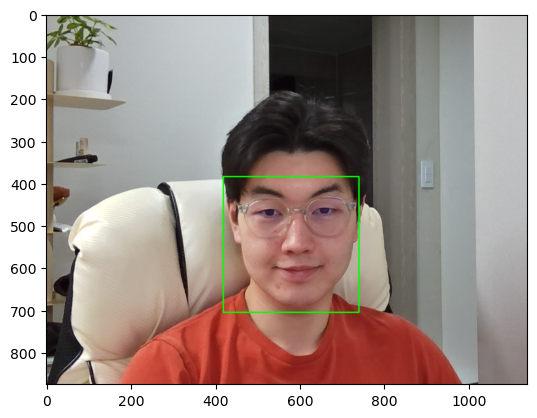

In [23]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [24]:
# 랜드마크 검출 모델 불러오기기
model_path = './models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [25]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


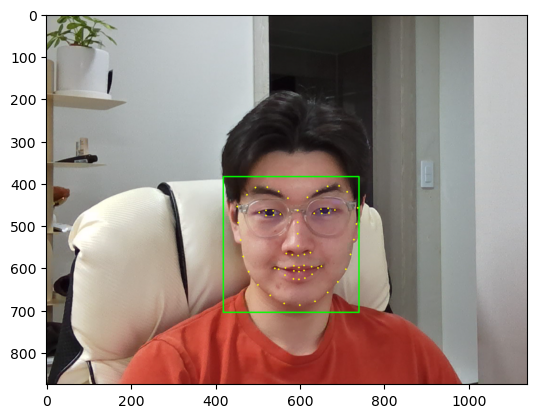

In [26]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [27]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(596, 548)
(x,y) : (596,548)
(w,h) : (322,322)


In [28]:
sticker_path = './cat-whiskers.png' # 고양이 수염염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(322, 322, 3)


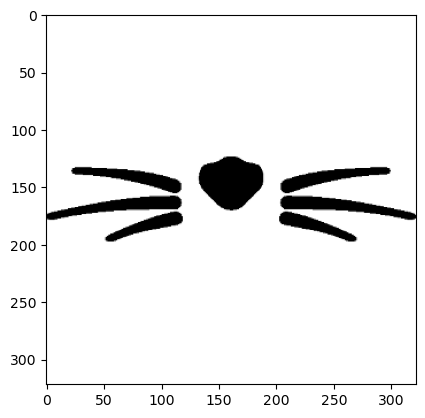

In [29]:
plt.imshow(img_sticker)
plt.show()

In [30]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2
refined_y = y - h // 2
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (435,387)


In [31]:
# 고양이 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (435,387)


In [32]:
img_sticker.shape

(322, 322, 3)

In [33]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


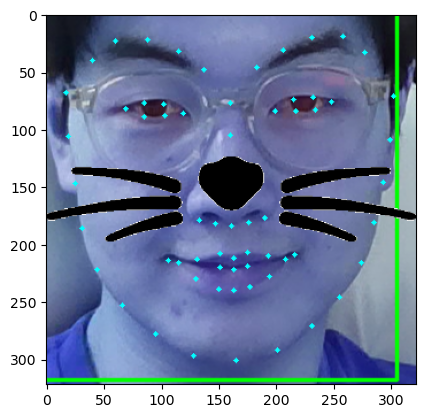

In [34]:
temp = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(temp)
plt.show()

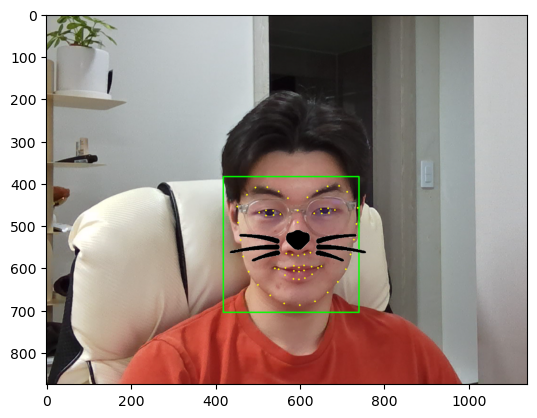

In [35]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

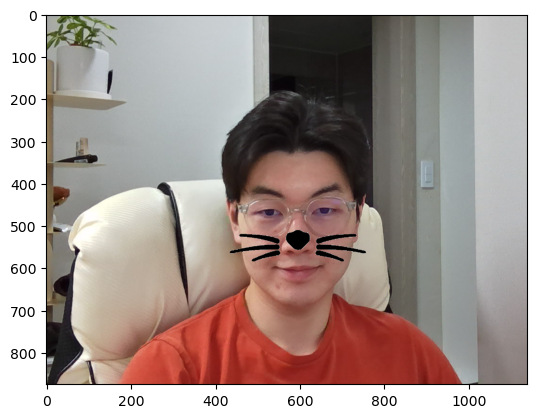

In [36]:
# 고양이 수염 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## Step 4. 스티커 적용하기
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [68]:
my_image_path = './my_selfie.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr_raw = cv2.imread(my_image_path)
img_bgr = img_bgr_raw.copy()   # OpenCV로 이미지를 불러옵니다
img_show = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [69]:
sticker_path = './cat-whiskers.png' # 고양이 수염염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h))

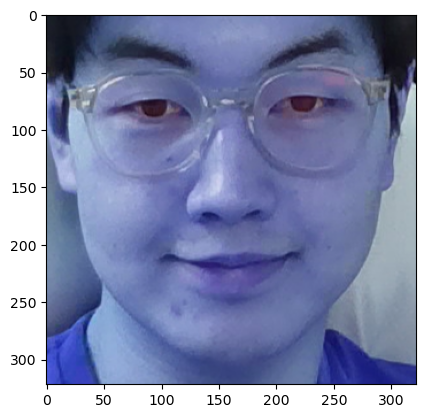

In [70]:
img_bgr_sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(img_bgr_sticker_area)
plt.show()

In [71]:
img_bgr_sticker_area.shape, img_sticker.shape

((322, 322, 3), (322, 322, 3))

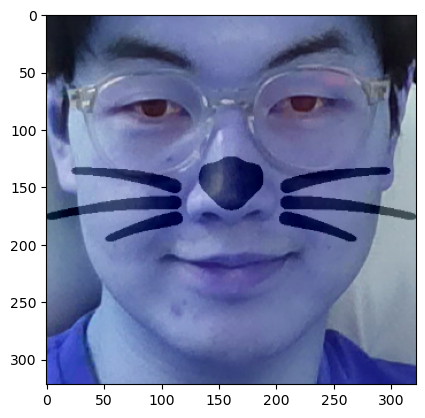

In [72]:
added_img = cv2.addWeighted(img_bgr_sticker_area, 1, img_sticker, 0.4, (-255*0.4))
plt.imshow(added_img)
plt.show()

In [73]:
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]].shape, added_img.shape

((322, 322, 3), (322, 322, 3))

In [74]:
# sticker area의 이미지 교체하기
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = added_img

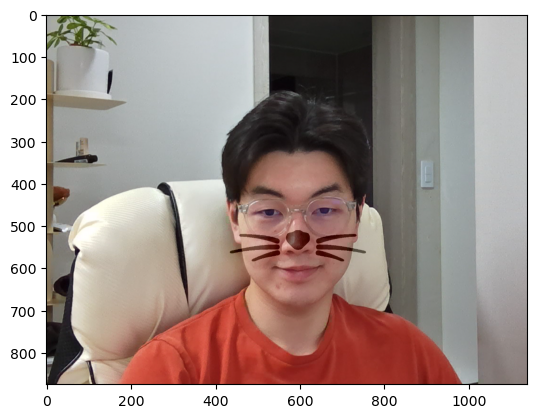

In [75]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

    오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

    - 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
    - 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
    - 실행 속도가 중요할까요?
    - 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

In [85]:
def load_img_bgr(image_path):
    img_bgr = cv2.imread(image_path)

    return img_bgr

def plt_imshow(img):
    plt.imshow(img)
    plt.show()

def load_img_rgb(image_path):
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    return img_rgb

def get_detect_rects(img_rgb, n_pyramid = 1):
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_rgb, 1)

    return dlib_rects

def get_coordinate(dlib_rects):
    rects_coordinates = list()

    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽
        rects_coordinates.append([l, t, r, b])

    return rects_coordinates

def draw_rect(img, rects_coordinates):
    for coordinate in rects_coordinates:
        l, t, r, b = coordinate
        cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

def get_detected_img(image_path):
    img_bgr = load_img_bgr(image_path)
    img_show = img_bgr.copy()
    # img_rgb = load_img_rgb(image_path)

    dlib_rects = get_detect_rects(img_show, n_pyramid = 1)
    rects_coordinates = get_coordinate(dlib_rects)

    draw_rect(img_show, rects_coordinates)
    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    return img_show_rgb

def get_detected_landmark_img(image_path, landmark_model_path):
    img_bgr = load_img_bgr(image_path)
    img_show = img_bgr.copy()
    img_rgb = load_img_rgb(image_path)

    dlib_rects = get_detect_rects(img_show, n_pyramid = 1)
    rects_coordinates = get_coordinate(dlib_rects)

    draw_rect(img_show, rects_coordinates)
    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
    
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        
    return img_show_rgb

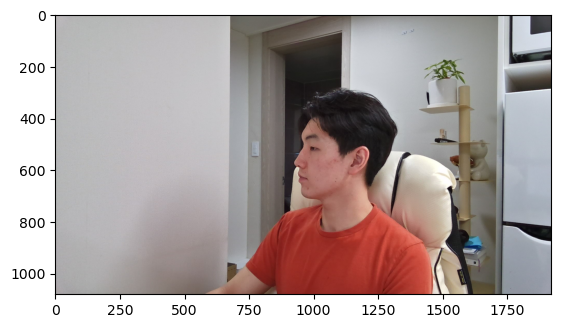

In [78]:
image_path = "./selfie/selfie_left.jpg"

img_show_rgb = get_detected_img(image_path)

plt_imshow(img_show_rgb)
plt.show()

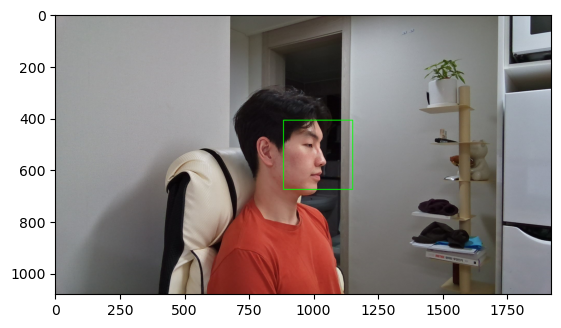

In [79]:
image_path = "./selfie/selfie_right.jpg"

img_show_rgb = get_detected_img(image_path)

plt_imshow(img_show_rgb)
plt.show()

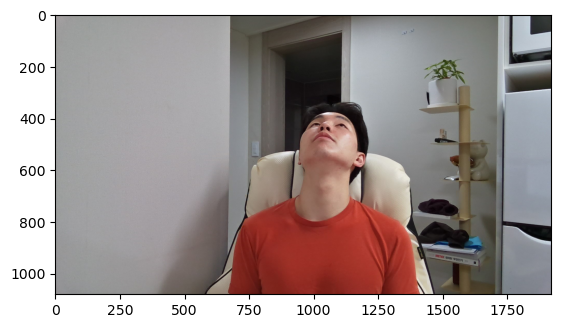

In [80]:
image_path = "./selfie/selfie_up.jpg"

img_show_rgb = get_detected_img(image_path)

plt_imshow(img_show_rgb)
plt.show()

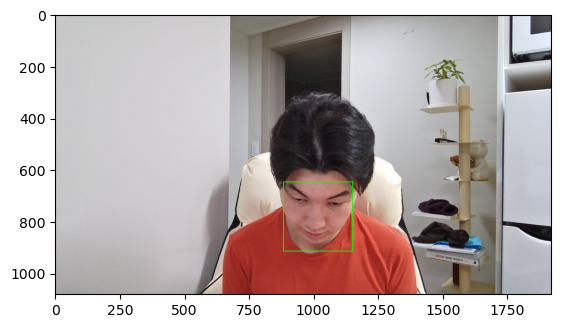

In [81]:
image_path = "./selfie/selfie_down.jpg"

img_show_rgb = get_detected_img(image_path)

plt_imshow(img_show_rgb)
plt.show()

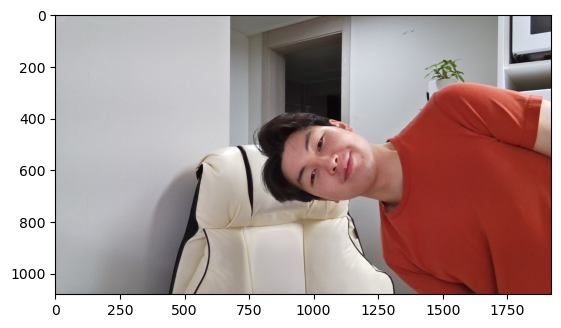

In [84]:
image_path = "./selfie/selfie_rotation.jpg"

img_show_rgb = get_detected_img(image_path)

plt_imshow(img_show_rgb)
plt.show()

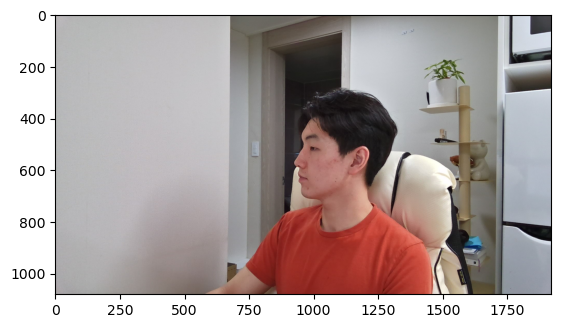

In [86]:
image_path = "./selfie/selfie_left.jpg"
model_path = './models/shape_predictor_68_face_landmarks.dat'

img_show_rgb = get_detected_landmark_img(image_path, model_path)

plt_imshow(img_show_rgb)
plt.show()

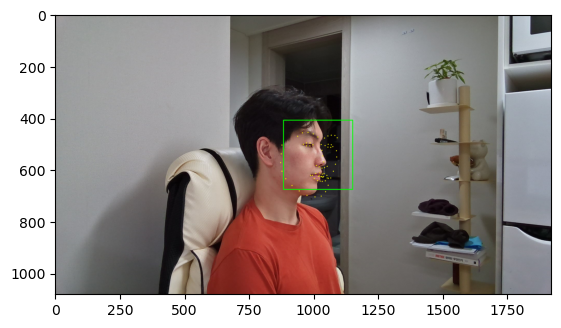

In [87]:
image_path = "./selfie/selfie_right.jpg"
model_path = './models/shape_predictor_68_face_landmarks.dat'

img_show_rgb = get_detected_landmark_img(image_path, model_path)

plt_imshow(img_show_rgb)
plt.show()

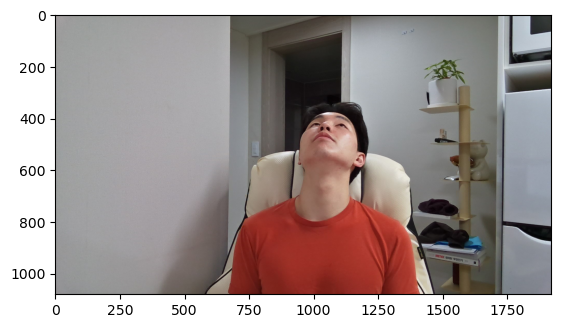

In [88]:
image_path = "./selfie/selfie_up.jpg"
model_path = './models/shape_predictor_68_face_landmarks.dat'

img_show_rgb = get_detected_landmark_img(image_path, model_path)

plt_imshow(img_show_rgb)
plt.show()

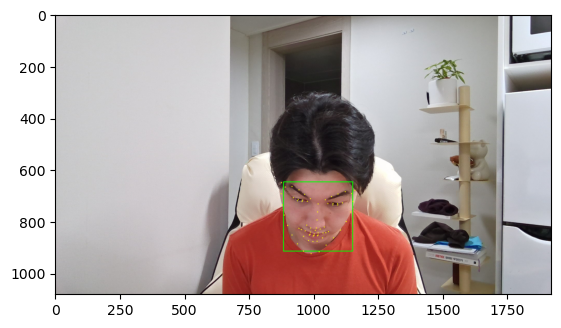

In [89]:
image_path = "./selfie/selfie_down.jpg"
model_path = './models/shape_predictor_68_face_landmarks.dat'

img_show_rgb = get_detected_landmark_img(image_path, model_path)

plt_imshow(img_show_rgb)
plt.show()

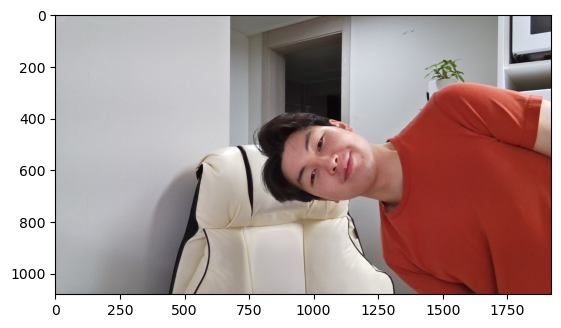

In [90]:
image_path = "./selfie/selfie_rotation.jpg"
model_path = './models/shape_predictor_68_face_landmarks.dat'

img_show_rgb = get_detected_landmark_img(image_path, model_path)

plt_imshow(img_show_rgb)
plt.show()

## 회고
사람의 정면 얼굴이 아니면 "dlib.get_frontal_face_detector" 은 잘 작동하지 않게 된다. 그이유는 함수 이름에서 알 수 있듯이, 사람의 정면 얼굴만 디텍션 하도록 되어있기 때문이다.
참고 : https://dlib.net/imaging.html#get_frontal_face_detector

gpt 답변

> dlib의 get_frontal_face_detector() 함수는 HOG(Histogram of Oriented Gradients) 특징과 선형 SVM(Support Vector Machine)을 활용하여 정면 얼굴을 검출합니다. 이러한 방식은 정면에 가까운 얼굴을 탐지하는 데 최적화되어 있으며, 측면 얼굴이나 회전된 얼굴에 대해서는 검출 성능이 저하될 수 있습니다. 
>
> 이러한 한계를 극복하기 위해, dlib은 MMOD CNN 기반의 얼굴 검출기를 제공합니다. 이 검출기는 딥러닝을 활용하여 다양한 각도의 얼굴을 보다 정확하게 탐지할 수 있습니다. 그러나 HOG 기반 검출기보다 속도가 느릴 수 있으며, GPU를 활용하여 성능을 향상시킬 수 있습니다.   
>
> 따라서, 다양한 각도의 얼굴을 효과적으로 검출하기 위해서는 MMOD CNN 기반의 얼굴 검출기를 사용하는 것이 권장됩니다.  

